# Assignment-1: Nearest Neighbours & KMeans


1.Use pandas to get some insights into the data

In [2]:
import pandas as pd

In [8]:
url="https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"

In [9]:
df = pd.read_csv(url)

In [12]:
#Explore the first few rows of the dataset using head()
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [13]:
#The No.of rows and columns
df.shape

(645, 8)

In [15]:
#check for missing values
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [16]:
#datatypes of the columns
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [18]:
#summary statistics of the dataset
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [21]:
#count of unique values
df.nunique()

Unnamed: 0     645
Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64

In [22]:
#correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.039687,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.039687,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,-0.008638,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

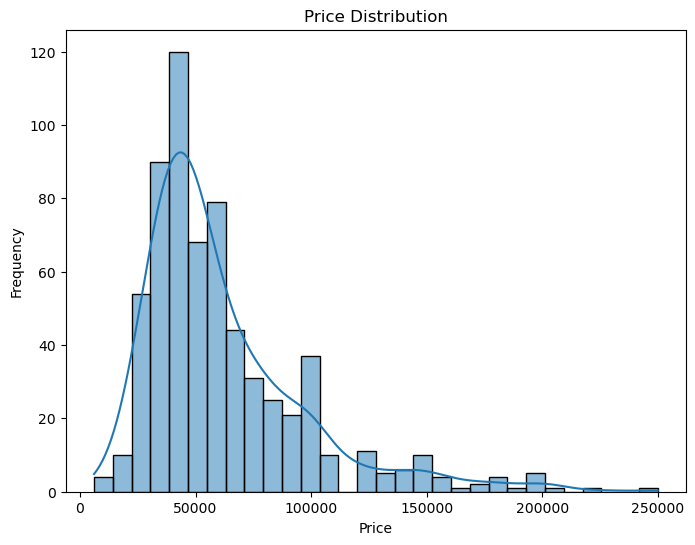

In [33]:
plt.figure(figsize=(8,6))
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
sns.histplot(df['Price'],kde=True)
plt.show()

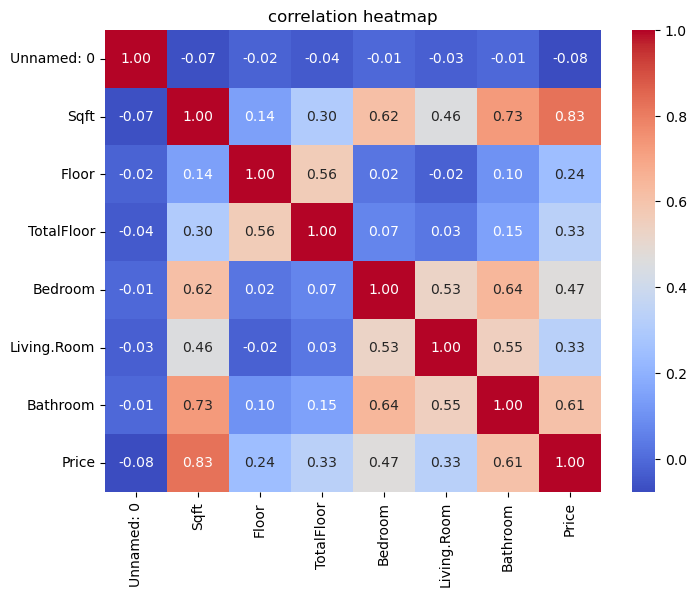

In [35]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

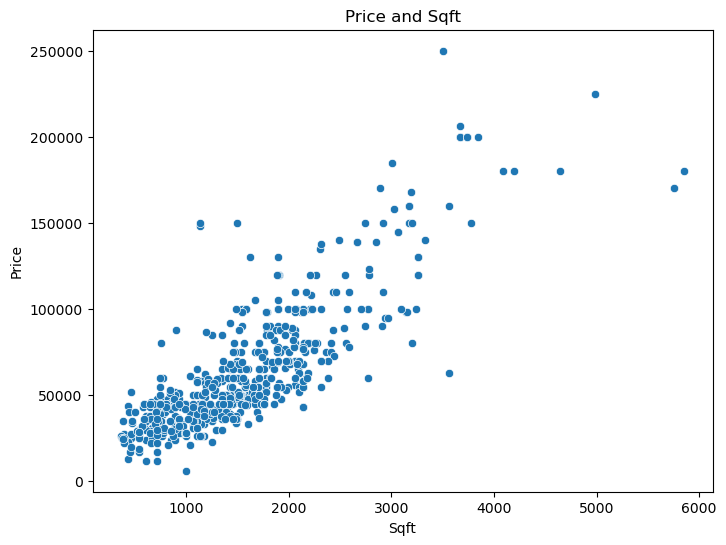

In [38]:
#Scatterplot of price and sqft
plt.figure(figsize=(8,6))
plt.title("Price and Sqft")
sns.scatterplot(x="Sqft",y="Price",data=df)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
X=df[['Sqft',"Floor","TotalFloor","Bedroom","Living.Room","Bathroom"]]
y=df['Price']

In [56]:
## Split data into training and testing sets (75% train, 25% test)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)


In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [59]:
knn_regressor=KNeighborsRegressor()

In [60]:
# Define a range of K values to try
k_values= range(1,21)

In [61]:
# Cross-validation to find the best K value

mae_scores = []

for k in k_values:
    knn_regressor.n_neighbors = k
    scores = cross_val_score(knn_regressor, X_train_scale, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores.append(-scores.mean())
mae_scores

[12636.757517182132,
 13187.50452104811,
 13453.825021477664,
 13366.90774806701,
 13588.565829037801,
 13563.901689576174,
 13571.722177221405,
 13698.439384664951,
 13853.551575028638,
 13861.790356529207,
 13865.63749218994,
 14019.36309421535,
 14185.87715767909,
 14304.48977509818,
 14511.174710767466,
 14605.072475032217,
 14736.925678441481,
 14890.439900725469,
 14962.293801998554,
 15117.826618341924]

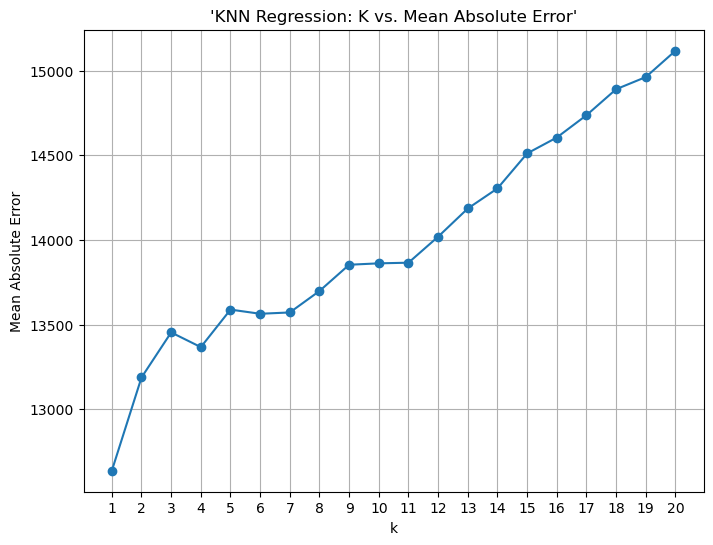

In [62]:
# Plot the K values against the mean absolute error
plt.figure(figsize=(8,6))
plt.title("'KNN Regression: K vs. Mean Absolute Error'")
plt.xlabel("k")
plt.ylabel("Mean Absolute Error")
plt.xticks(k_values)
plt.grid(True)
plt.plot(k_values,mae_scores,marker="o")
plt.show()

In [63]:
best_k = k_values[mae_scores.index(min(mae_scores))]
print(f"Best K value: {best_k}")

Best K value: 1
